# Part1_Question-5 By(Onur Copur)

## Import and clean Events_England DataSet 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
events = pd.read_json("DataSet\\events\\events_England.json")
events = events[events["subEventName"]=="Air duel"] #Fetch only Air Duels
events = events.rename(columns={"teamId":"wyId"}) # Change  teamId to wyId for later merge

## Import and clean players DataSet 

In [3]:
players = pd.read_json("DataSet\\players.json")
players = players.rename(columns={"wyId":"playerId"})# Change wyId to playerId for later merge

## Import and clean teams DataSet 

In [5]:
teams = pd.read_json("DataSet\\teams.json")
teams = teams[teams.type =="club"] # we don't want national teams
teams = teams[["name", "area", "wyId"]] # we don't need the other colums

# Create a DataFrame called premier league and add only the teams in England and Wales
premier_league = pd.DataFrame(columns=["name", "area", "wyId"])
for i in range(len(teams)):
    country = teams.iloc[i,:][1]["name"]
    if country == "England" or country == "Wales":
        premier_league = premier_league.append(teams.iloc[i,:])

premier_league.index = range(len(premier_league.index)) #fix the indices
del premier_league["area"] # we don't need area anymore

## MERGE DATAFRAMES

In [7]:
premier_league_Air_duels = pd.merge(premier_league, events, on='wyId', how='inner')

premier_league_Air_duels = pd.merge(premier_league_Air_duels, players, on='playerId', how='inner')

premier_league_Air_duels = premier_league_Air_duels[["name", "tags", "playerId", "shortName", "height"]] # we don't nedd the other colums

premier_league_Air_duels

,name,tags,playerId,shortName,height
0,Newcastle United,"[{'id': 701}, {'id': 1802}]",12536,D. Gayle,177
1,Newcastle United,"[{'id': 703}, {'id': 1801}]",12536,D. Gayle,177
2,Newcastle United,"[{'id': 701}, {'id': 1802}]",12536,D. Gayle,177
3,Newcastle United,"[{'id': 701}, {'id': 1802}]",12536,D. Gayle,177
4,Newcastle United,"[{'id': 703}, {'id': 1801}]",12536,D. Gayle,177
5,Newcastle United,"[{'id': 703}, {'id': 1801}]",12536,D. Gayle,177
6,Newcastle United,"[{'id': 703}, {'id': 1801}]",12536,D. Gayle,177
7,Newcastle United,"[{'id': 703}, {'id': 1801}]",12536,D. Gayle,177
8,Newcastle United,"[{'id': 701}, {'id': 1802}]",12536,D. Gayle,177
9,Newcastle United,"[{'id': 701}, {'id': 1802}]",12536,D. Gayle,177


## Eliminate all inaccurate events

In [8]:
premier_league_Air_duels =premier_league_Air_duels[premier_league_Air_duels["tags"].str[-1].str["id"]==1801]

## classify events as won, lost and neutral

In [10]:
status =[]
detailed_events = premier_league_Air_duels.loc[premier_league_Air_duels["tags"].str.len()>3]
for i in range(len(premier_league_Air_duels)):
    if len(premier_league_Air_duels.iloc[i,:][1]) == 2 :
        code = premier_league_Air_duels.iloc[i,:][1][0]["id"]
    elif len(premier_league_Air_duels.iloc[i,:][1]) == 3:
        code = premier_league_Air_duels.iloc[i,:][1][1]["id"]
    elif len(premier_league_Air_duels.iloc[i,:][1]) == 4:
        code = premier_league_Air_duels.iloc[i,:][1][2]["id"]
    if code == 701:
        status.append("lost")
    elif code == 702:
        status.append("neutral")
    elif code == 703:
        status.append("won")

premier_league_Air_duels["status"] = status

del premier_league_Air_duels["tags"]
premier_league_Air_duels

C:\Users\Onur\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,name,playerId,shortName,height,status
1,Newcastle United,12536,D. Gayle,177,won
4,Newcastle United,12536,D. Gayle,177,won
5,Newcastle United,12536,D. Gayle,177,won
6,Newcastle United,12536,D. Gayle,177,won
7,Newcastle United,12536,D. Gayle,177,won
10,Newcastle United,12536,D. Gayle,177,won
12,Newcastle United,12536,D. Gayle,177,won
14,Newcastle United,12536,D. Gayle,177,won
17,Newcastle United,12536,D. Gayle,177,won
20,Newcastle United,12536,D. Gayle,177,won


## count the number of unique players and calculate winning percentage of Air Duels

In [12]:
unique_players = premier_league_Air_duels.playerId.unique()

air_duel_summary = pd.DataFrame(columns=["name", "playerId", "shortName", "height", "percentage"])
for player in unique_players:
    df = premier_league_Air_duels[premier_league_Air_duels["playerId"]==player]
    if len(df)<20: # threshold  is 20 
        continue
    won = 0
    lost =0
    neutral =0
    for i in range(len(df)):
        if df.iloc[i,4]=="won":
            won+=1
        elif df.iloc[i, 4] == "lost":
            lost+=1
        else:
            neutral+=1
    percentage = won/(won+lost+neutral)
    air_duel_per = df.iloc[0, :-1]
    air_duel_per["percentage"] = percentage
    air_duel_summary = air_duel_summary.append(air_duel_per)

air_duel_summary = air_duel_summary.sort_values(by = ["height"])

heightVspercentage = air_duel_summary[["height", "percentage"]]
heightVspercentage

,height,percentage
15722,168,0.871795
31594,168,0.615385
33394,169,0.708333
14643,170,0.802817
29650,171,0.666667
27710,172,0.804348
663,172,0.681818
9140,172,0.857143
27517,173,0.692308
1945,173,0.821429


## put heights in intervals and create a scatter plot 

C:\Users\Onur\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Onur\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


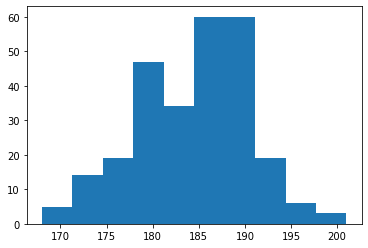

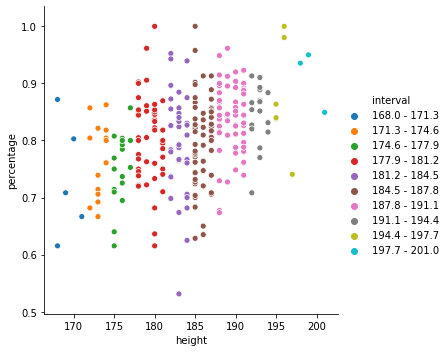

In [13]:
import seaborn as sns
tips = sns.load_dataset("tips")
hist = plt.hist(heightVspercentage["height"])[1] # intervals are created with histogram bin sizes
hist =hist.astype("float64")

category=[]
category_name =[]
for i in range(len(heightVspercentage)):
    for j in range(1,len(hist)):
        if heightVspercentage.iloc[i,0]<=hist[j]:
            category.append(j)
            category_name.append(str(hist[j-1]) +" - "+str(hist[j]))
            break
heightVspercentage["interval"]=category_name
heightVspercentage["category"]=category
sns.relplot(x="height", y="percentage",hue="interval", data=heightVspercentage)
